In [1]:
import pandas as pd

data = pd.read_csv("assignment1/dataset_mood_smartphone.csv")

print(data)

        Unnamed: 0       id                     time        variable   value
0                1  AS14.01  2014-02-26 13:00:00.000            mood   6.000
1                2  AS14.01  2014-02-26 15:00:00.000            mood   6.000
2                3  AS14.01  2014-02-26 18:00:00.000            mood   6.000
3                4  AS14.01  2014-02-26 21:00:00.000            mood   7.000
4                5  AS14.01  2014-02-27 09:00:00.000            mood   6.000
...            ...      ...                      ...             ...     ...
376907     2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
376908     2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
376909     2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
376910     2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
376911     2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 5 columns]


In [2]:
data.id.unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [ ]:
# user1 = data[data['id'] == "AS14.01"]
# user1_mood = user1[user1["variable"] == "mood"]

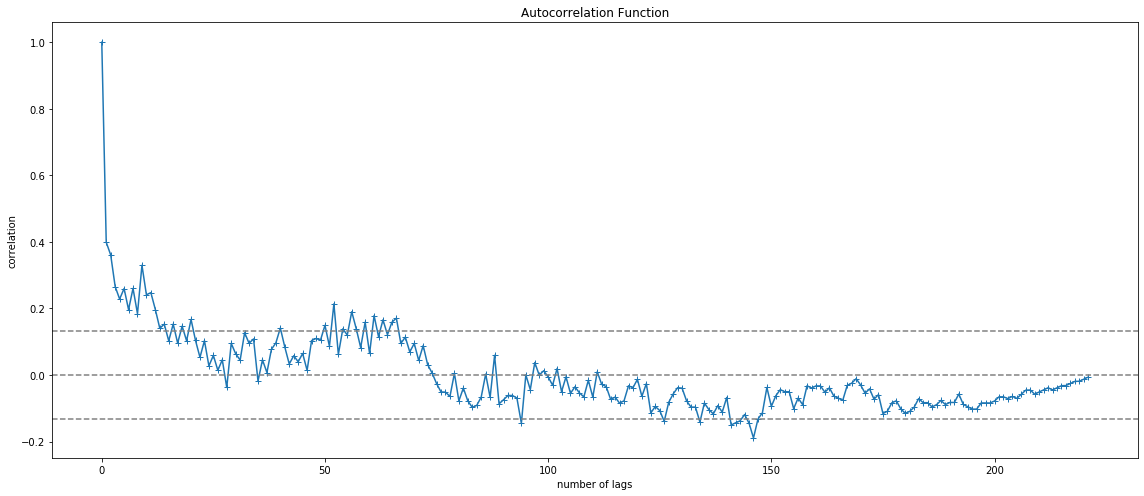

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

user = data[data['id'] == "AS14.01"]
user_mood = user[user["variable"] == "mood"]

avgs = []

moods = list(user_mood["value"])

lag_acf = acf(moods, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

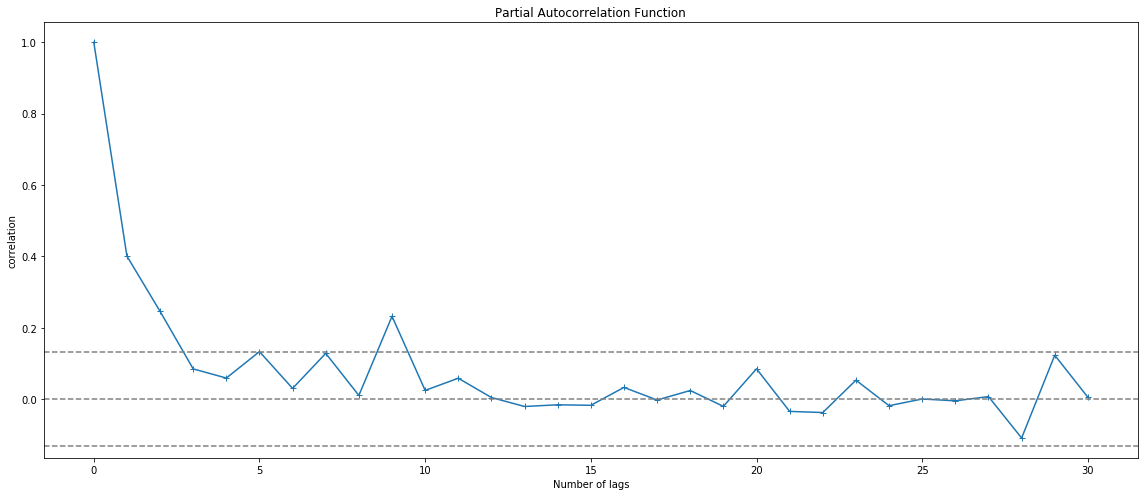

In [48]:
#calling partial correlation function
lag_pacf = pacf(moods, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(moods)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [9]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  221
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -240.936
Method:                       css-mle   S.D. of innovations              0.712
Date:                Fri, 03 Apr 2020   AIC                            497.872
Time:                        10:22:26   BIC                            525.057
Sample:                             1   HQIC                           508.849
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.001      5.531      0.000       0.004       0.009
ar.L1.D.y      0.1963      0.067      2.923      0.004       0.065       0.328
ar.L2.D.y      0.1429      0.068      2.095      0.0

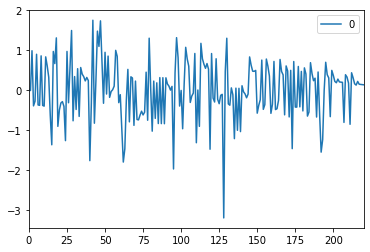

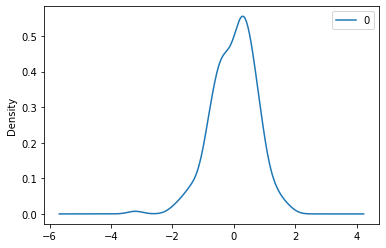

                0
count  221.000000
mean     0.006679
std      0.720555
min     -3.205528
25%     -0.425907
50%      0.099657
75%      0.479956
max      1.752574


In [10]:
model = ARIMA(moods, order=(2, 1, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=6.822943, expected=8.000000
predicted=7.115645, expected=8.000000
predicted=7.464517, expected=8.000000
predicted=7.511976, expected=8.000000
predicted=7.497817, expected=8.000000
predicted=7.571597, expected=7.000000
predicted=7.338614, expected=7.000000
predicted=7.168487, expected=7.000000
predicted=7.150165, expected=8.000000
predicted=7.431840, expected=7.000000
predicted=7.325857, expected=7.000000
predicted=7.176039, expected=8.000000
predicted=7.357960, expected=8.000000
predicted=7.603041, expected=8.000000
predicted=7.599096, expected=7.000000
predicted=7.341497, expected=7.000000
predicted=7.230210, expected=8.000000
predicted=7.458779, expected=7.000000
predicted=7.410263, expected=7.000000


C:\Users\folke\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=7.286670, expected=7.000000
predicted=7.185007, expected=8.000000
predicted=7.481467, expected=8.000000
predicted=7.597964, expected=8.000000
predicted=7.626086, expected=7.000000
predicted=7.378109, expected=8.000000
predicted=7.514060, expected=8.000000
predicted=7.660917, expected=7.000000
predicted=7.467145, expected=8.000000
predicted=7.493724, expected=6.000000
predicted=7.239199, expected=8.000000
predicted=7.378661, expected=7.000000
predicted=7.410984, expected=7.000000
predicted=7.368357, expected=8.000000
predicted=7.375054, expected=7.000000
predicted=7.510022, expected=8.000000
predicted=7.493220, expected=7.000000
predicted=7.416630, expected=8.000000
predicted=7.558735, expected=8.000000
predicted=7.620147, expected=7.000000
predicted=7.566755, expected=7.000000
predicted=7.281036, expected=8.000000
predicted=7.527054, expected=8.000000
predicted=7.734057, expected=8.000000
predicted=7.690170, expected=8.000000
predicted=7.666547, expected=7.000000
predicted=7.

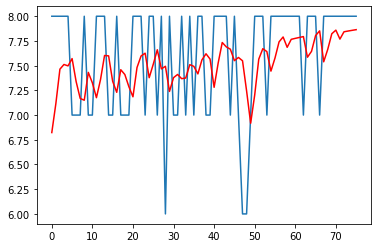

In [11]:
from sklearn.metrics import mean_squared_error

size = int(len(moods) * 0.66)

train, test = moods[0:size], moods[size:len(moods)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()